In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel(r"C:\Users\umars\Downloads\hellofinalnvidiadfmerged2.xlsx")

In [3]:
dataset

,Date,Open,High,Low,Close,Volume,Sentiment,Target
0,2022-01-03,29.770091,30.664742,29.740136,30.075630,391547000,0.815787,29.245882
1,2022-01-04,30.231395,30.422107,28.306299,29.245882,527154000,0.815787,27.562422
2,2022-01-05,28.905395,29.371693,27.491530,27.562422,498064000,0.815787,28.135557
3,2022-01-06,27.598367,28.395166,27.024235,28.135557,454186000,0.815787,27.205961
4,2022-01-07,28.098616,28.379193,27.016247,27.205961,409939000,0.815787,27.358728
...,...,...,...,...,...,...,...,...
612,2024-06-11,121.769997,122.870003,118.739998,120.910004,222551200,-0.954611,125.199997
613,2024-06-12,123.059998,126.879997,122.570000,125.199997,299595000,-0.954611,129.610001
614,2024-06-13,129.389999,129.800003,127.160004,129.610001,260704500,-0.954611,131.880005
615,2024-06-14,129.960007,132.839996,128.320007,131.880005,309320400,-0.954611,130.979996


In [4]:
dataset['Sentiment']

0      0.815787
1      0.815787
2      0.815787
3      0.815787
4      0.815787
         ...   
612   -0.954611
613   -0.954611
614   -0.954611
615   -0.954611
616   -0.954611
Name: Sentiment, Length: 617, dtype: float64

In [5]:
dataset["Date"] = pd.to_datetime(dataset.Date)

In [6]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Sentiment    0
Target       0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       617 non-null    datetime64[ns]
 1   Open       617 non-null    float64       
 2   High       617 non-null    float64       
 3   Low        617 non-null    float64       
 4   Close      617 non-null    float64       
 5   Volume     617 non-null    int64         
 6   Sentiment  617 non-null    float64       
 7   Target     617 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 38.7 KB


In [8]:
dataset.describe()

,Date,Open,High,Low,Close,Volume,Sentiment,Target
count,617,617.000000,617.000000,617.000000,617.000000,6.170000e+02,617.000000,617.000000
mean,2023-03-26 04:09:43.468395520,38.161918,38.882623,37.416319,38.207016,5.048961e+08,0.092063,38.378012
min,2022-01-03 00:00:00,10.961914,11.725282,10.804045,11.217703,1.679340e+08,-4.885003,11.217703
25%,2022-08-15 00:00:00,18.049851,18.346455,17.672098,18.029692,4.012770e+08,-0.954611,18.029692
50%,2023-03-27 00:00:00,27.217587,27.577889,26.679250,27.205961,4.785300e+08,0.815787,27.205961
75%,2023-11-03 00:00:00,46.949809,47.790691,46.319950,46.939816,5.737100e+08,0.815787,46.952946
max,2024-06-17 00:00:00,132.990005,133.729996,129.580002,131.880005,1.543911e+09,0.982361,135.580002
std,NaN,26.129499,26.540893,25.629521,26.160263,1.510789e+08,0.950466,26.450232


In [9]:
print(len(dataset))

617


<Axes: >

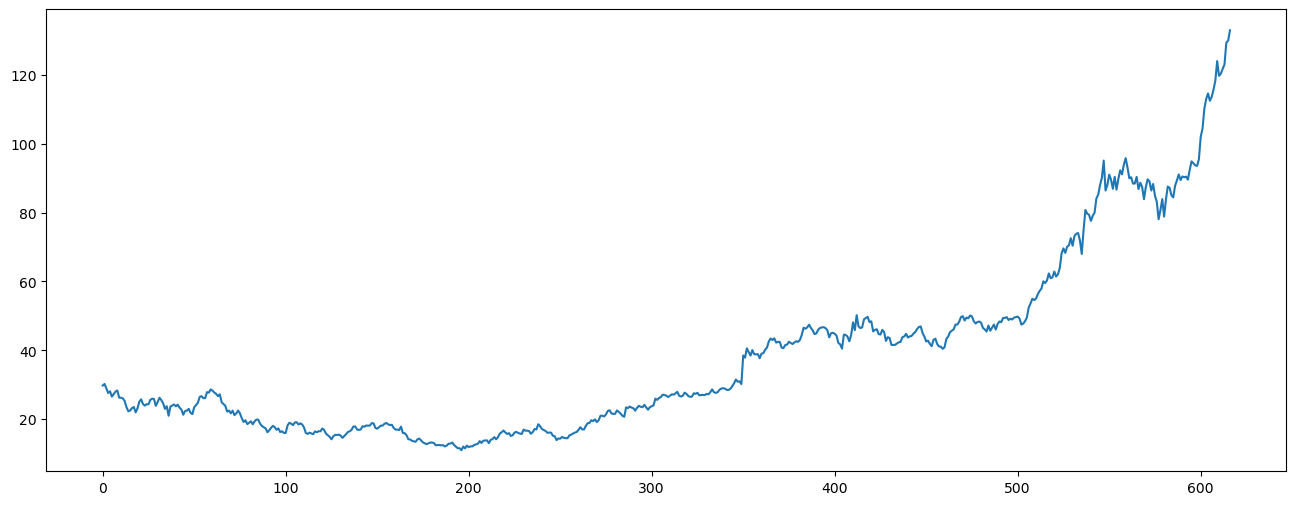

In [10]:
dataset['Open'].plot(figsize=(16,6))

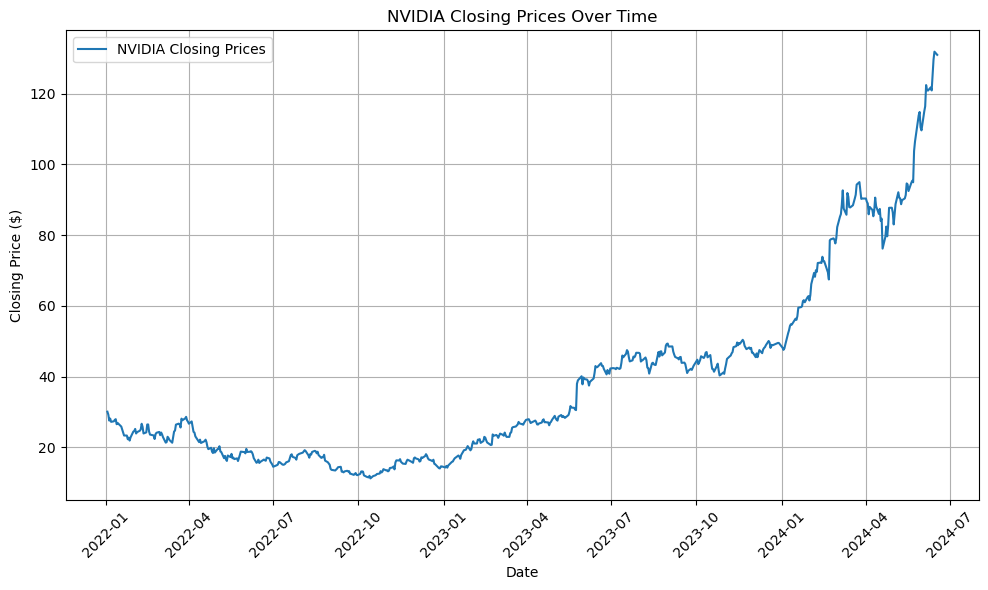

In [11]:
plt.figure(figsize=(10, 6))  

plt.plot(dataset['Date'], dataset['Close'], label='NVIDIA Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('NVIDIA Closing Prices Over Time')
plt.legend()
plt.grid(True)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
X = dataset[['Open','High','Low','Close','Volume','Sentiment']]
y = dataset[['Target']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
X_train.shape

(462, 6)

In [15]:
X_test.shape

(155, 6)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
print(regressor.coef_)

[[ 1.74125999e-02  1.13397526e-01 -7.50746424e-02  9.54448531e-01
  -2.36032471e-10  1.58325537e-01]]


In [19]:
print(regressor.intercept_)

[-0.21982374]


In [20]:
predicted = regressor.predict(X_test)

In [21]:
print(X_test)

          Open       High        Low      Close     Volume  Sentiment
49   21.489251  23.007220  21.293513  22.942307  491996000   0.815787
514  60.041251  60.323216  59.062377  59.646301  452955000  -0.020527
211  13.032200  13.769589  12.945272  13.409886  500065000   0.815787
249  14.393756  14.674594  14.218856  14.594640  354923000   0.815787
142  17.954777  18.119591  17.420379  17.963766  474646000   0.815787
..         ...        ...        ...        ...        ...        ...
313  27.497920  27.988721  27.324989  27.953735  398716000   0.815787
534  71.937712  71.946714  67.725258  69.443039  704833000  -0.020527
202  12.087982  12.487651  11.877157  12.455677  609494000   0.815787
89   17.323823  17.729281  16.545865  16.607780  670167000   0.815787
272  20.987978  21.936434  20.688150  21.696571  564276000   0.815787

[155 rows x 6 columns]


In [22]:
predicted.shape

(155, 1)

In [23]:
y_test.shape

(155, 1)

In [24]:
y_test = y_test.squeeze()
predicted = predicted.squeeze()

In [25]:
dframe = pd.DataFrame(y_test,predicted)

In [26]:
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})

In [27]:
print(dfr)

     Actual Price  Predicted Price
49      24.463272        23.075003
514     59.865276        60.051230
211     14.144278        13.406851
249     14.605634        14.602615
142     18.142569        18.002322
..            ...              ...
313     27.441942        28.096876
534     67.463295        70.217122
202     12.588566        12.388657
89      16.153391        16.672361
272     21.087921        21.784246

[155 rows x 2 columns]


In [28]:
dfr.head(25)

,Actual Price,Predicted Price
49,24.463272,23.075003
514,59.865276,60.051230
211,14.144278,13.406851
249,14.605634,14.602615
142,18.142569,18.002322
616,135.580002,132.326785
402,40.842777,42.327075
390,45.438400,45.926114
475,47.765636,48.733545
462,45.741074,45.088697


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score

In [30]:
regressor.score(X_test, y_test)

0.9961054353380369

In [31]:
import math

In [32]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error:  0.9775314006843946


In [33]:
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,predicted))

Mean Squared Error:  2.6146238258178482


In [34]:
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error:  1.6169798470660814


In [35]:
graph = dfr.head(20)

<Axes: >

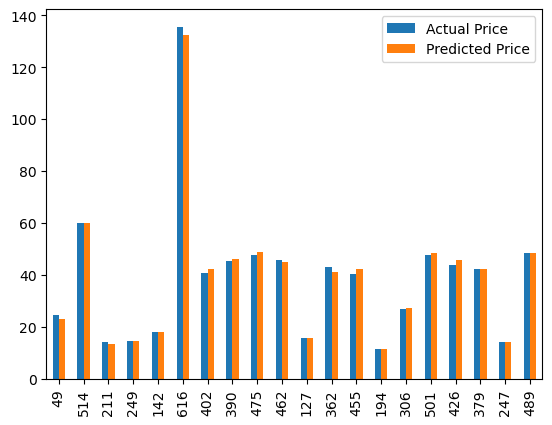

In [36]:
graph.plot(kind='bar')

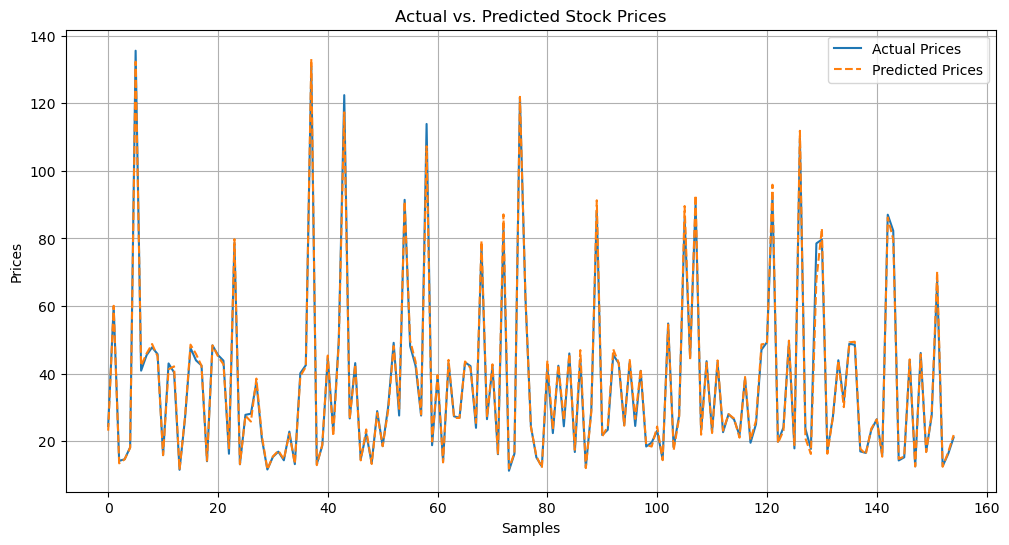

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(predicted, label='Predicted Prices', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 0.9775314006843946
MSE: 2.6146238258178482
RMSE: 1.6169798470660814
R²: 0.9961054353380369


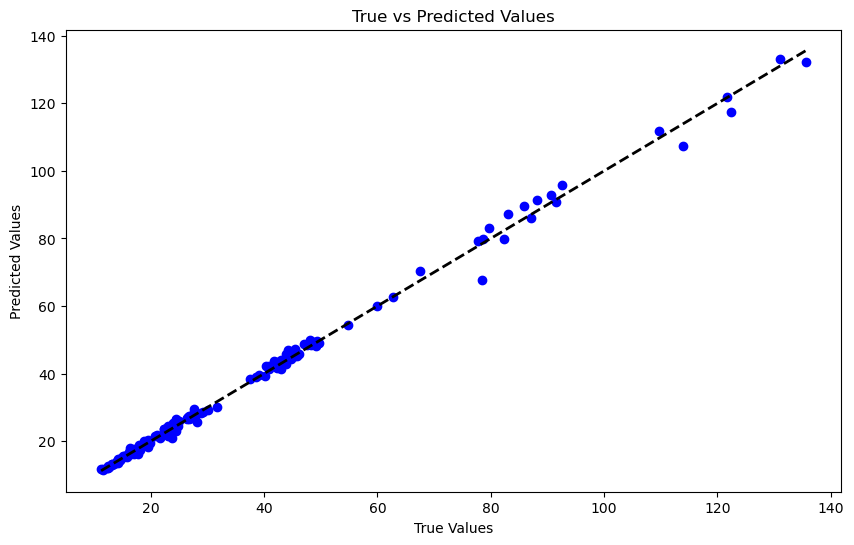

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

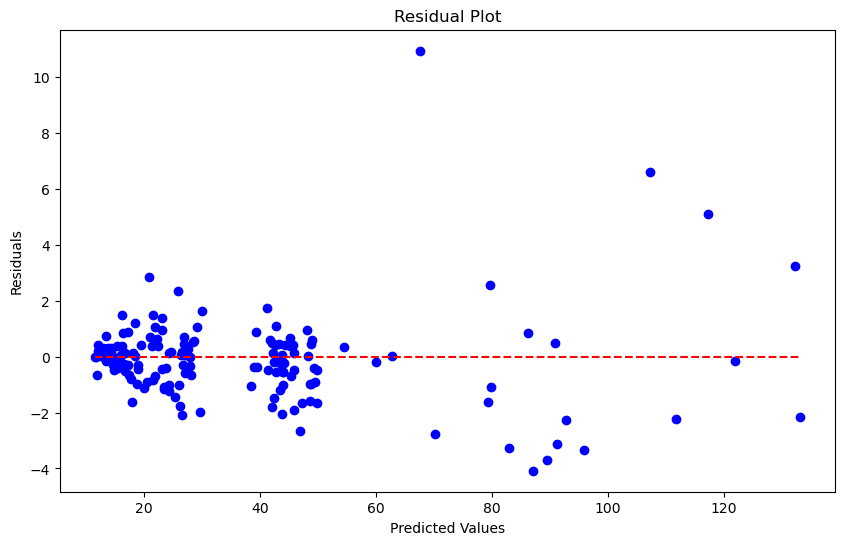

In [40]:
residuals = y_test - predicted

plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, color='blue')
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

# Define the linear regression model
linear_model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean()}")

Cross-validated RMSE scores: [0.98403977 0.5774927  1.02127058 1.06289693 2.68074845]
Mean CV RMSE: 1.2652896847835975


In [42]:
import joblib

# Save the model
joblib.dump(linear_model, 'nvidia_linear_regression_model_2.pkl')

# Load the model
loaded_model = joblib.load('nvidia_linear_regression_model_2.pkl')

In [43]:
regressor.predict(pd.DataFrame([['29.770091','30.664742','29.740136','30.075630','391547000','0.815787']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[30.28550973]])

In [44]:
regressor.predict(pd.DataFrame([['30.231395','30.422107','28.306299','29.245882','527154000','0.815787']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[29.54971341]])

In [45]:
regressor.predict(pd.DataFrame([['30.231395','30.422107','28.306299','29.245882','527154000','-0.815787']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[29.29139358]])

In [46]:
regressor.predict(pd.DataFrame([['132.99','133.73','129.58','130.98','288504400','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[132.32678981]])

In [47]:
regressor.predict(pd.DataFrame([['132.990005','133.729996','129.580002','130.979996','288504400','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[132.32678548]])

In [48]:
regressor.predict(pd.DataFrame([['131.14','136.33','130.69','135.58','294335100','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[136.89516422]])

In [49]:
regressor.predict(pd.DataFrame([['139.80','140.76','129.52','130.78','517768400','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[133.00205525]])

In [51]:
regressor.predict(pd.DataFrame([['127.12','130.63','124.30','126.57','655484700','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[127.97370234]])

In [52]:
regressor.predict(pd.DataFrame([['123.24','124.46','118.04','118.11','476060900','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[119.64416125]])

In [53]:
regressor.predict(pd.DataFrame([['121.20','126.50','119.32','126.09','425787500','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[127.37224039]])

In [54]:
regressor.predict(pd.DataFrame([['126.13','128.12','122.60','126.40','362975900','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[127.70624829]])

In [55]:
regressor.predict(pd.DataFrame([['124.10','126.41','122.92','123.99','252571700','-0.954611']], columns=['Open','High','Low','Close','Volume','Sentiment']))

array([[125.17880508]])

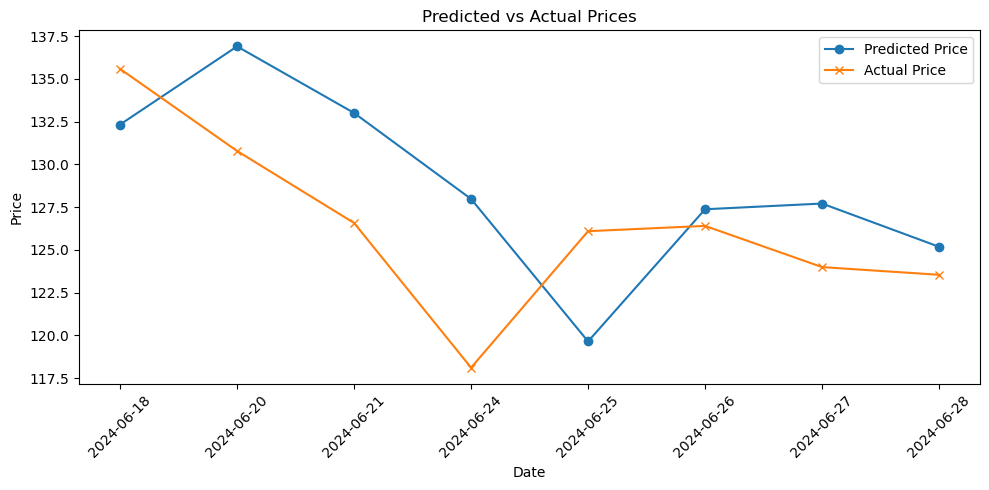

In [57]:
predicted_prices = [132.32678548, 136.89516422, 133.00205525, 127.97370234, 119.64416125, 127.37224039, 127.70624829, 125.17880508]
actual_prices = [135.58, 130.78, 126.57, 118.11, 126.09, 126.40, 123.99, 123.54]
dates = ["2024-06-18", "2024-06-20", "2024-06-21", "2024-06-24", "2024-06-25", "2024-06-26", "2024-06-27", "2024-06-28"]


predicted_data = {
    'Date': dates,
    'Predicted Price': predicted_prices,
    'Actual Price': actual_prices
}


predicted_df = pd.DataFrame(predicted_data)


plt.figure(figsize=(10, 5))
plt.plot(predicted_df['Date'], predicted_df['Predicted Price'], label='Predicted Price', marker='o')
plt.plot(predicted_df['Date'], predicted_df['Actual Price'], label='Actual Price', marker='x')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
import pickle

In [67]:
filename = 'nvidia_stock_market_prediction.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [74]:
with open('nvidia_stock_market_prediction.sav', 'rb') as file:
    prediction_loaded_model = pickle.load(file)

input_data = (124.10, 126.41, 122.92, 123.99, 252571700, 0.954611)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

stock_prediction = prediction_loaded_model.predict(input_data_reshaped)

print("The closing value of the stock tomorrow will be:", stock_prediction[0][0])

The closing value of the stock tomorrow will be: 125.48108367522644


C:\Users\umars\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [75]:
input_data = (124.10, 126.41, 122.92, 123.99, 252571700, -0.954611)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

stock_prediction = prediction_loaded_model.predict(input_data_reshaped)

print("The closing value of the stock tomorrow will be:", stock_prediction[0][0])

The closing value of the stock tomorrow will be: 125.17880507765659


C:\Users\umars\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
